In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns


In [236]:
df = pd.read_csv("tabela_1_ed_sem_2019.csv", index_col=[0])

In [237]:
df.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [238]:
titles = df[["Journal", "Title", "Year"]]

In [239]:
titles.head(5)

,Journal,Title,Year
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018


# Extração das espécies

In [307]:
import re
#acrescentei [A-Z] na frente do sp. nov,pq tinham gêneros sem espécie7
titles["species"] = titles["Title"].str.findall('[A-Z]\w+ [a-z]\w+ (?:sp\. nov|sp\.nov)|[A-Z]\w+ (?:sp\. nov|sp\.nov)|[A-Z]\w+ [a-z]\w+ (?:gen\. nov|gen\.nov)|[A-Z]. \w+ (?:sp\. nov|sp\.nov)') #tenta primeiro duas palavras antes do padrão, depois uma

titles.to_csv("species.txt") #Ficou ótimo, só teve problema as espécies com nome errado no banco de dados


/home/fernando/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [308]:
titles #posso verificar quais gêneros são mais isolados em cada país, por exemplo
titles["species"].to_csv("lista_species.csv")

In [309]:
#com esse código posso ver nomes de espécies que se repetem, são poucos, e ver quais gêneros são mais frequentes
from  itertools import chain
from collections import Counter

species = pd.Series(list(chain.from_iterable(titles["species"])))
freq_species = species.value_counts()
freq_species.to_csv("freq_species.csv")


In [310]:
freq_species.head(5)

Planktothrix serta sp. nov              3
Planktothrix paucivesiculata sp. nov    3
Enterococcus sp. nov                    3
Planktothrix tepida sp. nov             3
Cronobacter dublinensis sp. nov         2
dtype: int64

# Contagem gênero - tabela corrigida

In [313]:
freq_species_ncorr_df = pd.read_csv("freq_species_v4.csv")
freq_species_ncorr_df.head(3)


,name,freq,error
0,Acidovorax oryzae sp. Nov,1,abbreviated
1,Amycolatopsis tolypomycina sp. nov,1,abbreviated
2,Amycolatopsis vancoresmycina sp. nov,1,abbreviated


In [314]:
freq_species_ncorr_df["freq"].sum() # valor contando com as espécies repetidas

10887

In [315]:
freq_species_ncorr_df["genus"] = freq_species_ncorr_df["name"].str.split(" ").apply(lambda x: x[0])
freq_species_ncorr_df.head(3)

,name,freq,error,genus
0,Acidovorax oryzae sp. Nov,1,abbreviated,Acidovorax
1,Amycolatopsis tolypomycina sp. nov,1,abbreviated,Amycolatopsis
2,Amycolatopsis vancoresmycina sp. nov,1,abbreviated,Amycolatopsis


In [316]:
freq_species_ncorr_df["genus"].value_counts().to_csv("genera_counts.csv") #total de gêneros, 10845, algumas espécies se repetem

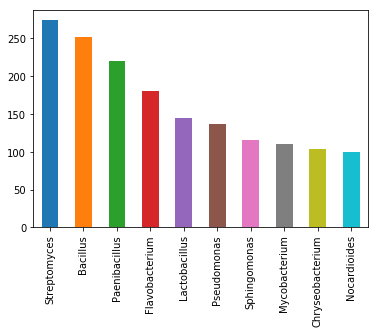

In [317]:
freq_species_ncorr_df["genus"].value_counts().head(10).plot(kind="bar")

In [318]:
freq_species_ncorr_df["genus"].value_counts().head(10).to_csv("generos.txt")

In [319]:
top_genera = pd.DataFrame(freq_species_ncorr_df["genus"].value_counts().head(10)).reset_index()
top_genera

,index,genus
0,Streptomyces,274
1,Bacillus,252
2,Paenibacillus,220
3,Flavobacterium,180
4,Lactobacillus,145
5,Pseudomonas,137
6,Sphingomonas,116
7,Mycobacterium,110
8,Chryseobacterium,103
9,Nocardioides,99


In [320]:
top_genera.columns = ["genus", "Frequency"]

In [321]:
top_genera

,genus,Frequency
0,Streptomyces,274
1,Bacillus,252
2,Paenibacillus,220
3,Flavobacterium,180
4,Lactobacillus,145
5,Pseudomonas,137
6,Sphingomonas,116
7,Mycobacterium,110
8,Chryseobacterium,103
9,Nocardioides,99


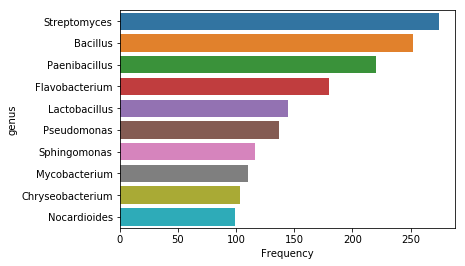

In [322]:
sns.barplot(x='Frequency', y='genus', data=top_genera)

# Correlacionar com Filos

In [323]:
filos = pd.read_csv("bac_lineages_ed3.csv")

In [324]:
filos.columns = ["phylum", "genus"]

In [325]:
filos.head(3)

,phylum,genus
0,Abawacabacteria,NaN
1,Abditibacteriota,NaN
2,Abditibacteriota,Abditibacterium


In [326]:
genus_counts = pd.DataFrame(freq_species_ncorr_df["genus"].value_counts()).reset_index()
genus_counts.columns = ["genus", "Frequency"]
genus_counts.to_csv("genus_counts.csv")

In [327]:
filo_genus = pd.merge(genus_counts, filos, on="genus")

In [328]:
filo_genus.to_csv("filo_genus.csv")

In [329]:
filo_counts = pd.DataFrame(filo_genus.groupby("phylum")["Frequency"].sum())

In [330]:
filo_counts["Frequency"].sum()

10844

In [331]:
filo_counts.sort_values(by="Frequency", ascending=False)

,Frequency
phylum,
Proteobacteria,4363
Actinobacteria,2400
Firmicutes,1875
Bacteroidetes,1704
Deinococcus-Thermus,87
Spirochaetes,55
Acidobacteria,46
Verrucomicrobia,45
Chloroflexi,34


In [332]:
top_filo = filo_counts.sort_values(by="Frequency", ascending=False).head(4)

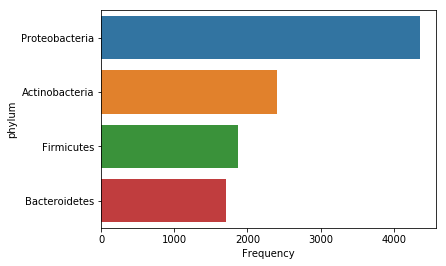

In [333]:
sns.barplot(x='Frequency', y=top_filo.index, data=top_filo)

# Verificar diferenças entre tabela dos filos e a tabela dos gêneros

In [334]:
merged = genus_counts.merge(filos, on="genus", indicator=True, how="outer")
sem_filo = merged[merged['_merge'] == 'left_only'] #3 sem filo
sem_filo.to_csv("sem_filo.csv")

# Wordclouds títulos

In [335]:
titles

,Journal,Title,Year,species
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",2018,[Leucothrix arctica sp. nov]
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",2018,[Hyphobacterium indicum sp. nov]
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,2018,[Sphingopyxis lindanitolerans sp. nov]
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",2018,"[Mesosutterella multiformis gen. nov, Sutterel..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",2018,[Acinetobacter sichuanensis sp. nov]
7,International journal of systematic and evolut...,"Enterobacter sichuanensis sp. nov., recovered ...",2018,[Enterobacter sichuanensis sp. nov]
8,International journal of systematic and evolut...,"Kribbella monticola sp. nov., a novel actinomy...",2018,[Kribbella monticola sp. nov]
9,International journal of systematic and evolut...,"Halomonas litopenaei sp. nov., a moderately ha...",2018,[Halomonas litopenaei sp. nov]
10,International journal of systematic and evolut...,"Alsobacter soli sp. nov., a novel bacterium is...",2018,[Alsobacter soli sp. nov]
11,International journal of systematic and evolut...,"Microbacterium halophytorum sp. nov., a novel ...",2018,[Microbacterium halophytorum sp. nov]


In [336]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from collections import Counter

only_titles = titles["Title"]
titles_cat = only_titles.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
titles_no_punct = titles_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(titles_no_punct.lower()) 

words_no_stops = [] 
for w in word_tokens:
    if w not in stop_words:
        words_no_stops.append(w)

In [337]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


In [338]:
words_no_stops

['leucothrix',
 'arctica',
 'sp',
 'nov',
 'isolated',
 'arctic',
 'seawater',
 'hyphobacterium',
 'indicum',
 'sp',
 'nov',
 'isolated',
 'deep',
 'seawater',
 'emended',
 'description',
 'genus',
 'hyphobacterium',
 'sphingopyxis',
 'lindanitolerans',
 'sp',
 'nov',
 'strain',
 'ws5a3pt',
 'enriched',
 'pesticide',
 'disposal',
 'site',
 'mesosutterella',
 'multiformis',
 'gen',
 'nov',
 'sp',
 'nov',
 'member',
 'family',
 'sutterellaceae',
 'sutterella',
 'megalosphaeroides',
 'sp',
 'nov',
 'isolated',
 'human',
 'faeces',
 'acinetobacter',
 'sichuanensis',
 'sp',
 'nov',
 'recovered',
 'hospital',
 'sewage',
 'china',
 'enterobacter',
 'sichuanensis',
 'sp',
 'nov',
 'recovered',
 'human',
 'urine',
 'kribbella',
 'monticola',
 'sp',
 'nov',
 'novel',
 'actinomycete',
 'isolated',
 'soil',
 'halomonas',
 'litopenaei',
 'sp',
 'nov',
 'moderately',
 'halophilic',
 'exopolysaccharide-producing',
 'bacterium',
 'isolated',
 'shrimp',
 'hatchery',
 'alsobacter',
 'soli',
 'sp',
 'nov

In [339]:
undesirable_words = ["sp", "nov", "gen", "bacterium", "bacteria", "descriptions", "emended", "isolated", "genus", "novel", "member", "description", "member", "family", "species", "proposal", "et", "al", "new"]

filtered_words = [] 
for w in words_no_stops:
    if w not in undesirable_words:
        filtered_words.append(w)

In [340]:
import numpy as np

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

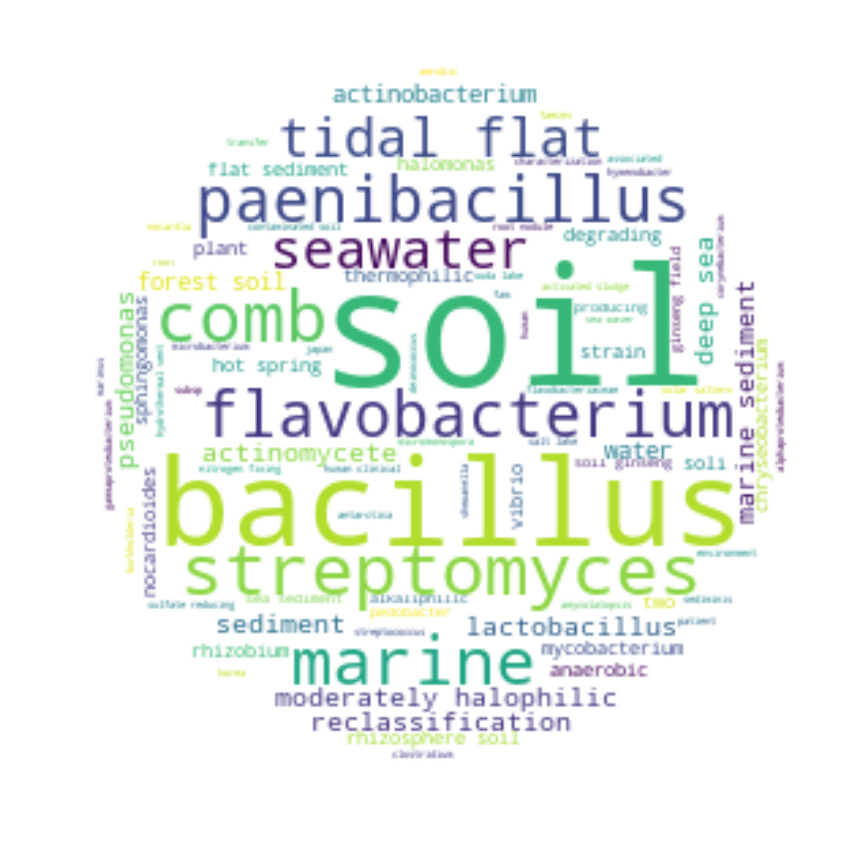

In [341]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=300, background_color="white", mask=mask).generate(" ".join(filtered_words))

# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()